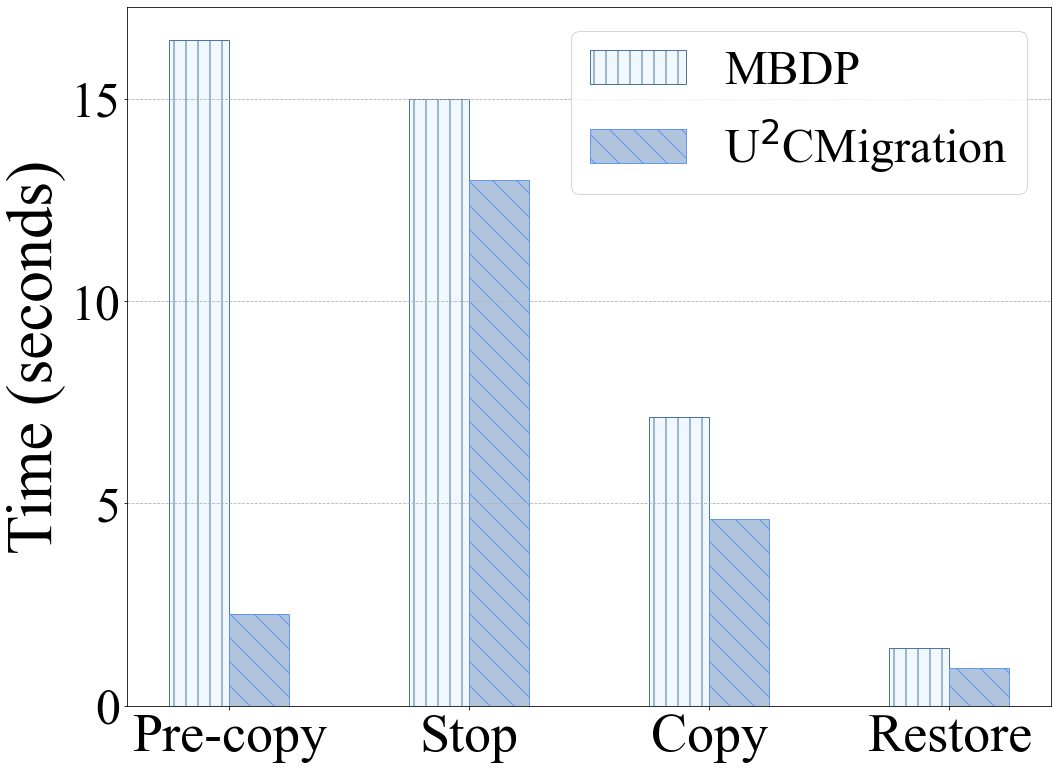

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib
# Set font configurations
label_size = 64
tick_size = 54
linewidth = 2.5
legend_size = 48
mark_size = 10
bwith = 2
matplotlib.rcParams['font.family'] = ['Times New Roman']
matplotlib.rcParams['font.size'] = 50
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
def convert_size(size_str):
    """Converts a size string like '312M' to bytes using binary units."""
    size_str = size_str.strip().upper()
    multipliers = {'K': 1024, 'M': 1024**2, 'G': 1024**3, 'T': 1024**4}
    if size_str[-1] in multipliers:
        return float(size_str[:-1]) * multipliers[size_str[-1]]
    return float(size_str)


# Data setup
CHK_SIZE = ["1.2M", "220M", "363M", "353M", "1.0G", "850M"]
CHECK_CHK_SIZE = ["1.2M", "70M", "200M", "550M", "0", "0"]

chk_size_bytes = [convert_size(size) for size in CHK_SIZE]
check_chk_size_bytes = [convert_size(size) for size in CHECK_CHK_SIZE]

transfer_speed = 1000 * 125000  # 1000 Mbps to bytes/s
transfer_times_chk_size = [size / transfer_speed for size in chk_size_bytes]
transfer_times_check_chk_size = [size / transfer_speed for size in check_chk_size_bytes]

# Calculating total times
origin_predump_time = sum(transfer_times_chk_size[:-1])
check_predump_time = sum(transfer_times_check_chk_size[:3])
origin_dump_time = sum(transfer_times_chk_size[-1:])
check_dump_time = sum(transfer_times_check_chk_size[3:])
origin_restore_time = origin_dump_time * 0.2
check_restore_time = check_dump_time * 0.2  # Should be calculated from check_dump_time

data = np.array([
    [origin_predump_time, check_predump_time],  # Pre-dump
    [15, 13],  # Stop time
    [origin_dump_time, check_dump_time],  # Transfer Time
    [origin_restore_time, check_restore_time],  # Restore Time
])

components = ['Pre-copy', 'Stop', 'Copy', 'Restore']
colors = ["#F0F8FD", "#B0C4DE", "#F3FAF3", "#E4F4F4"]
hatches = ['|', '\\', '|', '-']
edgecolors = ['#49759c', '#6495ED', '#6f7632', '#5f7500']
bar_width = 0.25

# Plotting
plt.figure(figsize=(16, 12))
index = np.arange(len(components))
for i in range(2):  # Plotting two bars per component
    plt.bar(index + i * bar_width, data[:, i], bar_width, label=f'Condition {i+1}',
           color=colors[i], hatch=hatches[i], edgecolor=edgecolors[i])

# Chart settings
plt.ylabel('Time (seconds)', fontsize=label_size)
#plt.title('Container Migration Strategies Comparison')
plt.xticks(index + bar_width/2, components, fontsize=tick_size)
plt.legend(['MBDP', 'U$^{2}$CMigration'], fontsize=legend_size)
plt.grid(axis='y', linestyle='--')

# Display the chart
plt.tight_layout()
import os   
plt.savefig(os.path.join(".", "time_mem.pdf"), format='pdf', bbox_inches='tight')
#fig.savefig(os.path.join(".", "time_all_migrate_2.png"), format='png', bbox_inches='tight')
plt.show()


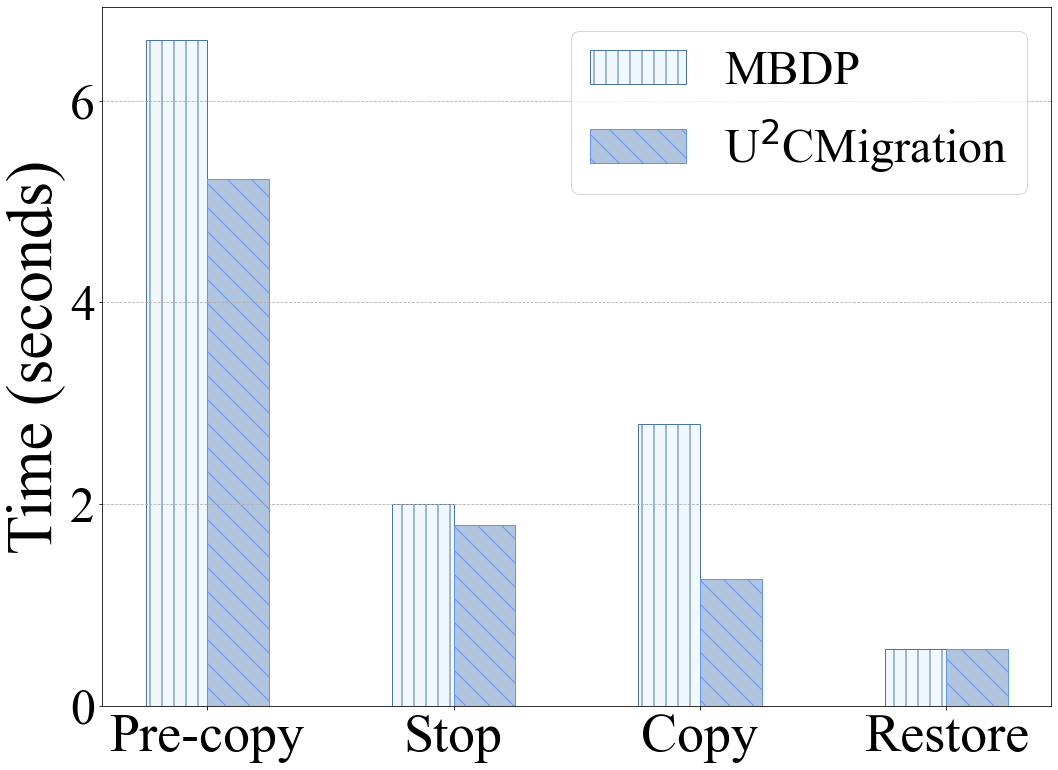

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# label_size = 50
# tick_size = 38
# linewidth = 2.5
# legend_size = 34
# mark_size = 10
# bwith = 2
# matplotlib.rcParams['font.family'] = ['Times New Roman']
# matplotlib.rcParams['font.size'] = 32
# matplotlib.rcParams['pdf.fonttype'] = 42
# matplotlib.rcParams['ps.fonttype'] = 42
# Function to convert size strings to bytes
# def convert_size(size_str):
#     """Converts a size string like '312M' to bytes."""
#     size_str = size_str.strip().upper()
#     multipliers = {'K': 1e3, 'M': 1e6, 'G': 1e9}
#     if size_str[-1] in multipliers:
#         return float(size_str[:-1]) * multipliers[size_str[-1]]
#     return float(size_str)

# Data setup
CHK_SIZE2 = ["623M", "74M", "90M", "333M"]
CHECK_CHK_SIZE2_0 = ["623M", "74M", "90M", "333M"]
CHECK_CHK_SIZE2 = ["623M", "150M", "0M", "0M"]
chk_size_bytes2 = [convert_size(size) for size in CHK_SIZE2]
check_chk_size_bytes2 = [convert_size(size) for size in CHECK_CHK_SIZE2]
# 计算每个数据集的传输时间
transfer_times_chk_size2 = [size / transfer_speed for size in chk_size_bytes2]
transfer_times_check_chk_size2 = [size / transfer_speed for size in check_chk_size_bytes2]

# 计算总时间
origin_predump_time2 = sum(transfer_times_chk_size2[:-1])
check_predump_time2 = sum(transfer_times_check_chk_size2[:1])
origin_dump_time2 = sum(transfer_times_chk_size2[-1:])
check_dump_time2 = sum(transfer_times_check_chk_size2[1:])
origin_restore_time2 = origin_dump_time2 * 0.2
check_restore_time2 = origin_dump_time2* 0.2

# 准备第二组数据
data = np.array([
    [origin_predump_time2, check_predump_time2],  # Pre-dump
    [2, 1.79],  # Stop time, 使用示例数据
    [origin_dump_time2, check_dump_time2],  # Transfer Time
    [origin_restore_time2, check_restore_time2],  # Restore Time
])

components = ['Pre-copy', 'Stop', 'Copy', 'Restore']
colors = ["#F0F8FD", "#B0C4DE", "#F3FAF3", "#E4F4F4"]
hatches = ['|', '\\', '|', '-']
edgecolors = ['#49759c', '#6495ED', '#6f7632', '#5f7500']
bar_width = 0.25

# Plotting
plt.figure(figsize=(16, 12))
index = np.arange(len(components))
for i in range(2):  # Plotting two bars per component
    plt.bar(index + i * bar_width, data[:, i], bar_width, label=f'Condition {i+1}',
           color=colors[i], hatch=hatches[i], edgecolor=edgecolors[i])

# Chart settings
plt.ylabel('Time (seconds)', fontsize=label_size)
#plt.title('Container Migration Strategies Comparison')
plt.xticks(index + bar_width/2, components, fontsize=tick_size)
plt.legend(['MBDP', 'U$^{2}$CMigration'], fontsize=legend_size)
plt.grid(axis='y', linestyle='--')

# Display the chart
plt.tight_layout()
import os   
plt.savefig(os.path.join(".", "time_npb.pdf"), format='pdf', bbox_inches='tight')
#fig.savefig(os.path.join(".", "time_all_migrate_2.png"), format='png', bbox_inches='tight')
plt.show()
